<a href="https://colab.research.google.com/github/nikhil2003-hub/portfolio/blob/main/User_Profiling_and_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: KONIDALA NIKHILESH**
----------------------------------------------------------------
chosen problem statement:

##User Profiling and Segmentation

User profiling and segmentation are powerful techniques that enable data professionals to understand their user base in-depth and tailor their strategies to meet diverse user needs. Below is the process we can follow for the task of User Profiling and Segmentation:

1. Determine what you aim to achieve with user profiling and segmentation, such as improving customer service, personalized marketing, or product recommendation.
2. Collect data from various sources, including user interactions on websites/apps, transaction histories, social media activity, and demographic information.
3. Create new features that capture relevant user behaviours and preferences. It may involve aggregating transaction data, calculating the frequency of activities, or extracting patterns from usage logs.
4. Select appropriate segmentation techniques.
5. For each segment identified, create user profiles that summarize the key characteristics and behaviours of users in that segment. User profiling is the process of creating a detailed description of someone based on their personal information, characteristics, interests, online behavior, and other relevant attributes.
6. The given dataset comprises a diverse set of user metrics collected from an online platform, consisting of 1,000 user profiles with 16 distinct features. These features include demographics (age, gender, income level, and education), online behavior (likes and reactions, followed accounts, device usage), engagement with content (time spent online during weekdays and weekends, click-through rates, conversion rates), interaction with ads (ad interaction time), and user interests.
7. Your task is to develop a robust user profiling and segmentation system that leverages machine learning and data analysis techniques to categorize users into distinct segments. By analyzing user interaction data, demographic information, and engagement metrics, identify meaningful patterns and clusters within the user base. The ultimate goal is to enable businesses to tailor their advertising campaigns to the identified segments, thereby increasing ad relevance, user engagement, and conversion rates while optimizing ad spend.


In [2]:
pip install pandas scikit-learn matplotlib seaborn tabulate

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from math import pi

# ====================
#1. Load Dataset
# ====================

In [5]:
df = pd.read_csv('/content/user_profiles_for_ads.csv')

# ====================================
# 2. Data Understanding & Preprocessing
# ======================================

In [6]:
import pandas as pd
from tabulate import tabulate

info_df = pd.DataFrame(
    {
        "Column": df.columns,
        "Non-Null Count": df.count().values,
        "Dtype": df.dtypes.values,
    }
)
print(tabulate(info_df, headers='keys', tablefmt='pretty'))

+----+---------------------------------+----------------+---------+
|    |             Column              | Non-Null Count |  Dtype  |
+----+---------------------------------+----------------+---------+
| 0  |             User ID             |      1000      |  int64  |
| 1  |               Age               |      1000      | object  |
| 2  |             Gender              |      1000      | object  |
| 3  |            Location             |      1000      | object  |
| 4  |            Language             |      1000      | object  |
| 5  |         Education Level         |      1000      | object  |
| 6  |       Likes and Reactions       |      1000      |  int64  |
| 7  |        Followed Accounts        |      1000      |  int64  |
| 8  |          Device Usage           |      1000      | object  |
| 9  | Time Spent Online (hrs/weekday) |      1000      | float64 |
| 10 | Time Spent Online (hrs/weekend) |      1000      | float64 |
| 11 |    Click-Through Rates (CTR)    |      10

In [7]:
summary_df = df.describe()
print(summary_df)           # tabular form
summary_df.to_csv('summary.csv')
summary_df.to_excel('summary.xlsx')

           User ID  Likes and Reactions  Followed Accounts  \
count  1000.000000          1000.000000        1000.000000   
mean    500.500000          4997.084000         251.438000   
std     288.819436          2838.494365         141.941557   
min       1.000000           101.000000          10.000000   
25%     250.750000          2661.250000         126.000000   
50%     500.500000          5002.500000         245.500000   
75%     750.250000          7348.750000         377.000000   
max    1000.000000          9973.000000         498.000000   

       Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
count                      1000.000000                      1000.000000   
mean                          2.757500                         4.601600   
std                           1.279735                         2.026234   
min                           0.500000                         1.000000   
25%                           1.700000                         2.9

In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

In [9]:
# Drop User ID
user_df = df.drop(columns=['User ID'])

# ==========================
# 3. Exploratory Data Analysis
# ==========================

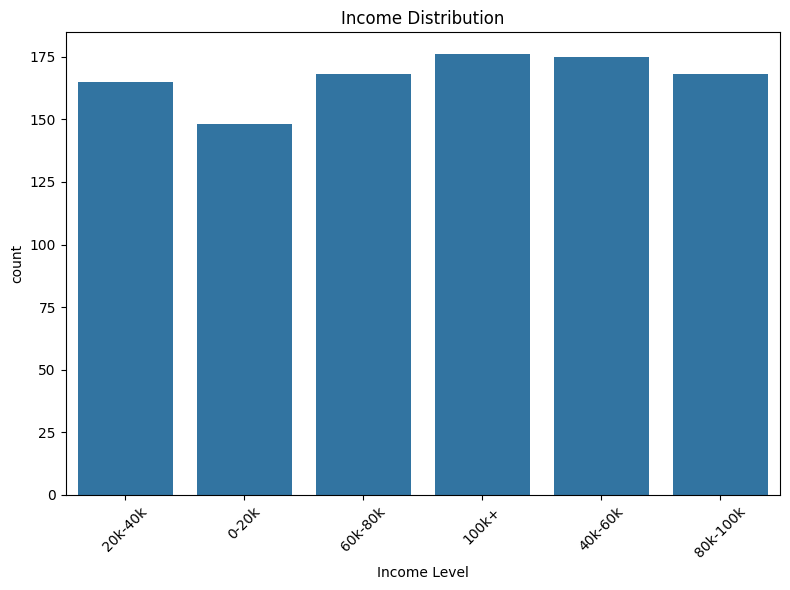

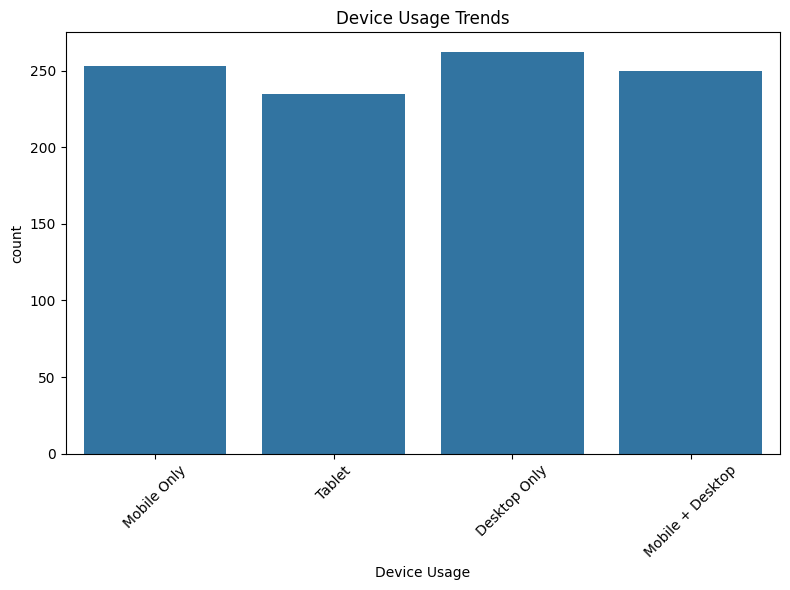

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=user_df, x='Income Level')
plt.title('Income Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=user_df, x='Device Usage')
plt.title('Device Usage Trends')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===================
# 4. Feature Engineering
# ====================

In [11]:
categorical_cols = ['Age', 'Gender', 'Location', 'Language', 'Education Level', 'Device Usage', 'Income Level']
num_cols = user_df.select_dtypes(include=np.number).columns

# One-hot encoding
user_df_encoded = pd.get_dummies(user_df, columns=categorical_cols)

# Drop the 'Top Interests' column before scaling
user_df_encoded = user_df_encoded.drop(columns=['Top Interests'])

# Scaling
scaler = StandardScaler()
user_df_scaled = scaler.fit_transform(user_df_encoded)

# ====================
# 5. Segmentation (ML Models)
# ====================

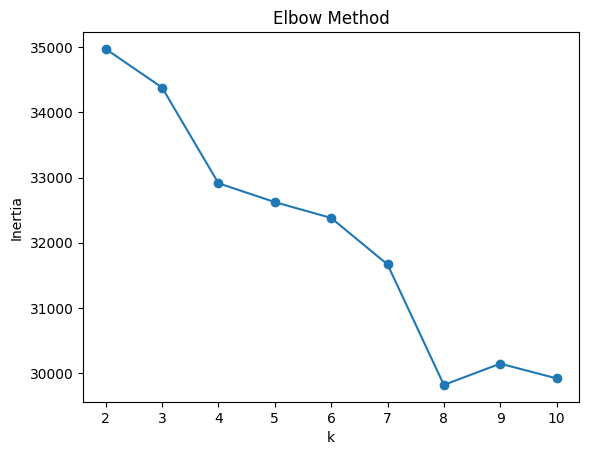

In [12]:
# KMeans Elbow Method
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [13]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(user_df_scaled)
    score = silhouette_score(user_df_scaled, labels)
    print(f'Silhouette score for k={k}: {score:.2f}')

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(user_df_scaled)
user_df['Cluster_KMeans'] = kmeans_labels
print('KMeans cluster assignments:', pd.Series(kmeans_labels).value_counts())

agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(user_df_scaled)
user_df['Cluster_Agg'] = agg_labels
print('Agglomerative clustering assignments:', pd.Series(agg_labels).value_counts())

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(user_df_scaled)
user_df['Cluster_GMM'] = gmm_labels
print('Gaussian Mixture clustering assignments:', pd.Series(gmm_labels).value_counts())

cluster_summary = pd.DataFrame({
    'KMeans Cluster': kmeans_labels,
    'Agglomerative Cluster': agg,
    'GMM Cluster': gmm
})
print('Cluster assignments per user profile:')
print(cluster_summary.head())

Silhouette score for k=2: 0.05
Silhouette score for k=3: 0.03
Silhouette score for k=4: 0.07
Silhouette score for k=5: 0.05
Silhouette score for k=6: 0.04
Silhouette score for k=7: 0.05
Silhouette score for k=8: 0.08
Silhouette score for k=9: 0.05
Silhouette score for k=10: 0.05
KMeans cluster assignments: 0    262
1    253
2    250
3    235
Name: count, dtype: int64
Agglomerative clustering assignments: 2    485
0    385
1     84
3     46
Name: count, dtype: int64
Gaussian Mixture clustering assignments: 0    262
1    253
2    250
3    235
Name: count, dtype: int64
Cluster assignments per user profile:
   KMeans Cluster                  Agglomerative Cluster  \
0               1  AgglomerativeClustering(n_clusters=4)   
1               3  AgglomerativeClustering(n_clusters=4)   
2               1  AgglomerativeClustering(n_clusters=4)   
3               0  AgglomerativeClustering(n_clusters=4)   
4               1  AgglomerativeClustering(n_clusters=4)   

                            

# ====================
# 6. Segment Profiling
# ====================

In [14]:
cluster_profiles = user_df.groupby('Cluster_KMeans')[num_cols].mean()
print(cluster_profiles)

                Likes and Reactions  Followed Accounts  \
Cluster_KMeans                                           
0                       4948.671756         253.278626   
1                       5045.845850         250.355731   
2                       5083.116000         249.732000   
3                       4907.038298         252.365957   

                Time Spent Online (hrs/weekday)  \
Cluster_KMeans                                    
0                                      2.883969   
1                                      2.743083   
2                                      2.674800   
3                                      2.720000   

                Time Spent Online (hrs/weekend)  Click-Through Rates (CTR)  \
Cluster_KMeans                                                               
0                                      4.669466                   0.124427   
1                                      4.634387                   0.120866   
2                               

# ====================
# 7. Visualization with PCA (principal component analysis)
# ====================

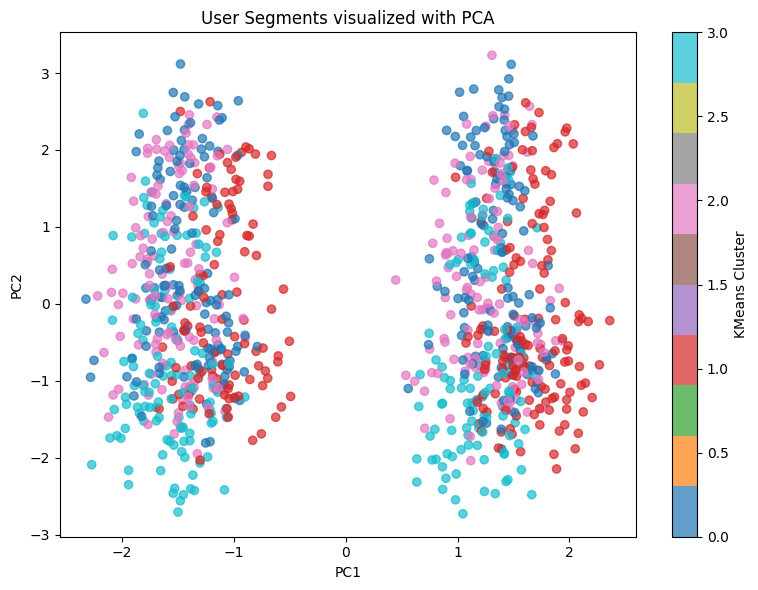

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
user_df_pca = pca.fit_transform(user_df_scaled)
plt.figure(figsize=(8,6))
plt.scatter(user_df_pca[:,0], user_df_pca[:,1], c=kmeans_labels, cmap='tab10', alpha=0.7)
plt.title('User Segments visualized with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='KMeans Cluster')
plt.tight_layout()
plt.show()

# ========================
# 8. Visualization with Heat Map
# =========================

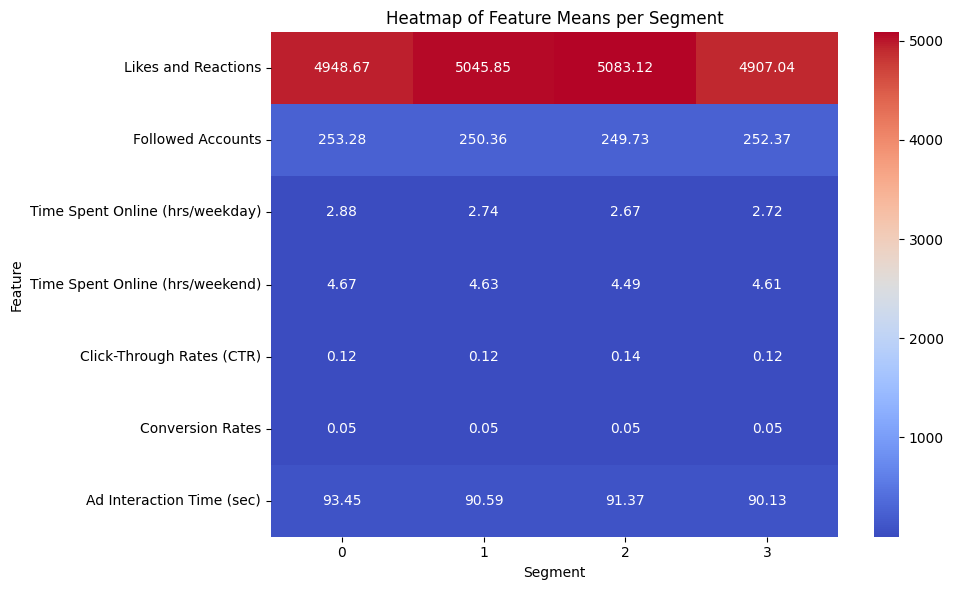

In [16]:
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
segment_means = user_df.groupby('Cluster_KMeans')[num_cols].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(segment_means.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Feature Means per Segment')
plt.ylabel('Feature')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

# =========================
# 9. Visualization with 3D Graphs
# =========================

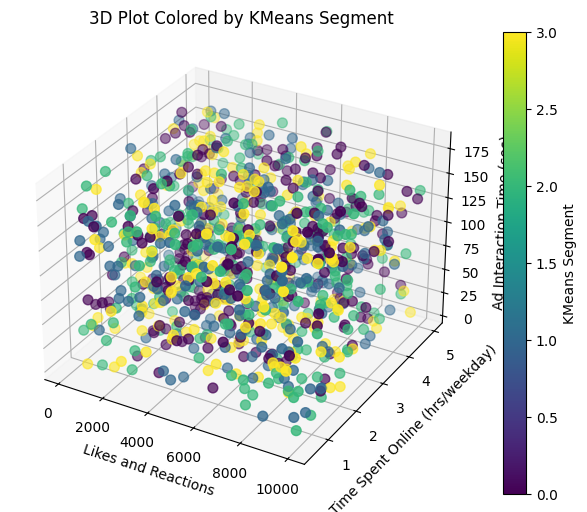

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x_col = 'Likes and Reactions'
y_col = 'Time Spent Online (hrs/weekday)'
z_col = 'Ad Interaction Time (sec)'
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(user_df[x_col], user_df[y_col], user_df[z_col], c=user_df['Cluster_KMeans'], cmap='viridis', s=50)

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
plt.title('3D Plot Colored by KMeans Segment')
plt.colorbar(scatter, ax=ax, label='KMeans Segment')
plt.show()

# ==============================
# 10. Visualization with Sankey Diagram
# ==============================

In [18]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
import pandas as pd
sankey_df = user_df.groupby(['Age', 'Cluster_KMeans']).size().reset_index(name='Count')
sources = list(sankey_df['Age'].unique())
targets = list(sankey_df['Cluster_KMeans'].unique())
labels = sources + [f'Cluster {s}' for s in targets]
sankey_df['source_idx'] = sankey_df['Age'].apply(lambda g: labels.index(g))
sankey_df['target_idx'] = sankey_df['Cluster_KMeans'].apply(lambda s: labels.index(f'Cluster {s}'))
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, label=labels),
    link=dict(
        source=sankey_df['source_idx'],
        target=sankey_df['target_idx'],
        value=sankey_df['Count']
    )
)])
fig.update_layout(title_text='Sankey Diagram: Age → User Segments', font_size=12)
fig.show()

# ====================
# 11. Visualization per segment
# ====================
Example radar chart for each segment


(You can iterate over clusters)

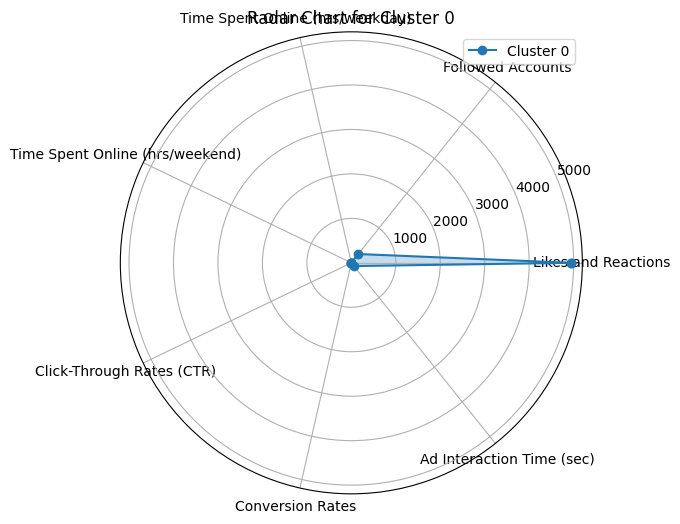

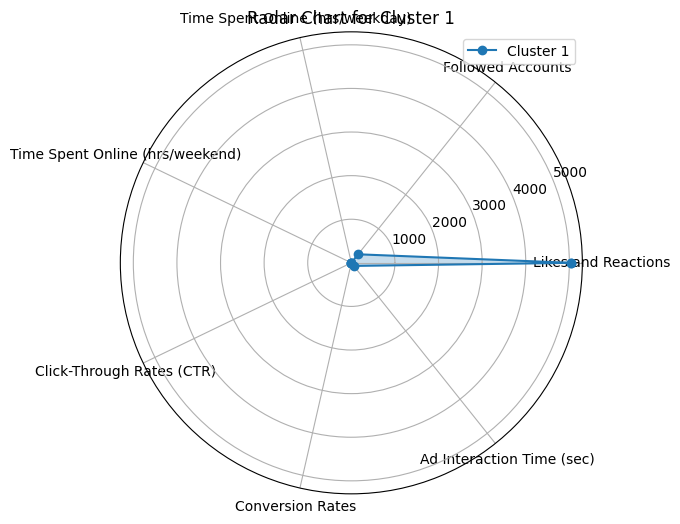

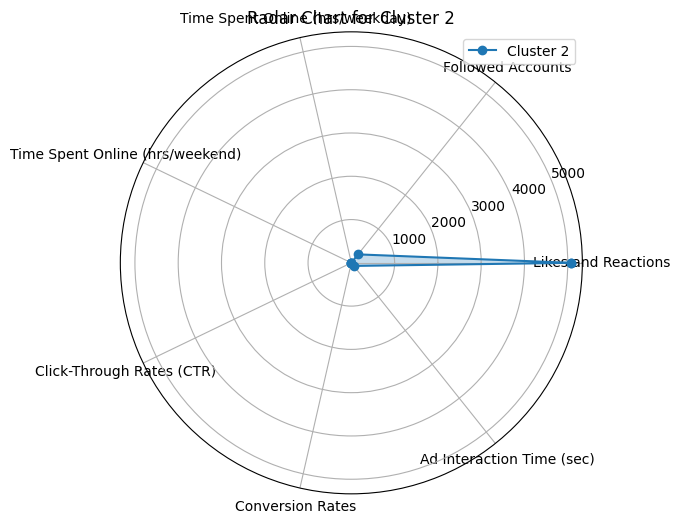

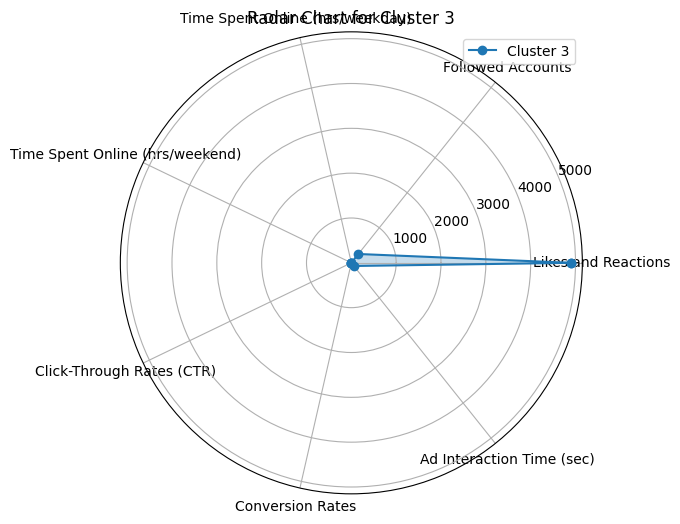

In [20]:
import math

categories = list(cluster_profiles.columns)
n_clusters = cluster_profiles.shape[0]

for cluster in range(n_clusters):
    values = cluster_profiles.iloc[cluster].values.flatten().tolist()
    values += values[:1]
    angles = [n/len(categories)*2*math.pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, marker='o', label=f'Cluster {cluster}')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, rotation=45)
    ax.set_title(f'Radar Chart for Cluster {cluster}')
    ax.legend()
    plt.show()

# ====================
# 12. Business Implications
# ====================

Identify key segment features and recommend tailored strategies.


In [21]:
print("Segmentation completed. Review profiles for tailored ad strategies.")

Segmentation completed. Review profiles for tailored ad strategies.


In [22]:
!pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [25]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# 🎯 Load your user data
# Assuming 'user_df' is already loaded and contains 'Cluster_KMeans'
df = user_df.copy() # Use the existing user_df DataFrame

# Initialize the app
app = dash.Dash(__name__)
app.title = "User Segmentation Dashboard"

# Available segments
# Use the unique values from 'Cluster_KMeans'
segment_options = sorted(df['Cluster_KMeans'].unique())

# 🎨 APP LAYOUT
app.layout = html.Div(
    style={'font-family': 'sans-serif', 'padding': '20px'},
    children=[
        html.H1('User Segmentation Dashboard', style={'text-align': 'center'}),

        # Dropdown filter
        html.Label('Filter by Segment:'),
        dcc.Dropdown(
            id='segment-dropdown',
            # Convert segment numbers to strings for display in dropdown
            options=[{'label': f'Cluster {s}', 'value': s} for s in segment_options],
            multi=True,
            placeholder='Select one or more segments',
            style={'width': '50%'}
        ),

        html.Br(),

        # Charts
        dcc.Graph(id='scatter-3d'),
        dcc.Graph(id='heatmap'),
        dcc.Graph(id='bar-segments')
    ]
)

# 🎯 CALLBACKS
@app.callback(
    Output('scatter-3d', 'figure'),
    Output('heatmap', 'figure'),
    Output('bar-segments', 'figure'),
    Input('segment-dropdown', 'value')
)
def update_charts(selected_segments):
    dff = df.copy()
    if selected_segments:
        dff = dff[dff['Cluster_KMeans'].isin(selected_segments)]

    # 📊 3D scatter of three numeric columns
    # Use existing numeric columns from user_df
    fig_3d = px.scatter_3d(
        dff,
        x='Likes and Reactions', # Replace with an existing numeric column
        y='Time Spent Online (hrs/weekday)', # Replace with an existing numeric column
        z='Ad Interaction Time (sec)', # Replace with an existing numeric column
        color='Cluster_KMeans', # Use the KMeans cluster column
        opacity=0.7,
        title='3D Scatter by Segment'
    )

    # 📊 Heatmap of average feature values per segment
    # Ensure only numeric columns are included for the mean calculation
    numeric_cols_for_heatmap = dff.select_dtypes(include=np.number).columns.tolist()
    if 'Cluster_KMeans' in numeric_cols_for_heatmap:
        numeric_cols_for_heatmap.remove('Cluster_KMeans') # Exclude the cluster column from the heatmap features

    heat_df = dff.groupby('Cluster_KMeans')[numeric_cols_for_heatmap].mean()

    fig_heat = px.imshow(
        heat_df.T,
        aspect='auto',
        color_continuous_scale='Blues',
        title='Heatmap of Feature Means per Segment',
        x=heat_df.index.astype(str) # Ensure x-axis labels are strings
    )

    # 📊 Bar chart of segment sizes
    size_df = dff['Cluster_KMeans'].value_counts().reset_index()
    size_df.columns = ['Segment', 'Count']
    # Sort segments for consistent bar chart order
    size_df['Segment'] = size_df['Segment'].astype(str).apply(lambda x: f'Cluster {x}')
    size_df = size_df.sort_values('Segment')

    fig_bar = px.bar(
        size_df,
        x='Segment',
        y='Count',
        color='Segment',
        title='User Counts per Segment'
    )

    return fig_3d, fig_heat, fig_bar


# 🎯 Run the app
if __name__ == '__main__':
    # Set a different port if needed to avoid conflicts
    app.run(debug=True, mode='inline', port=8050)

<IPython.core.display.Javascript object>

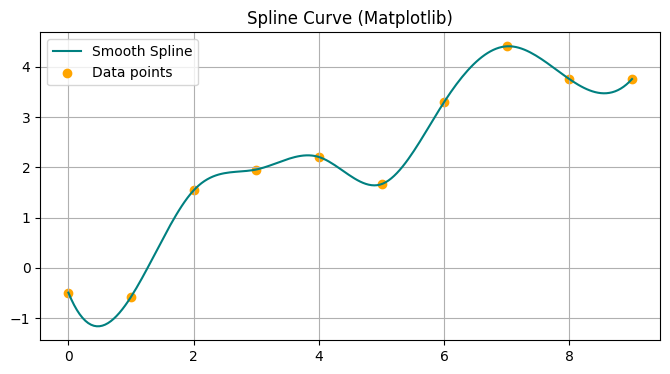

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Original data
x = np.arange(0, 10, 1)
y = np.random.randn(len(x)).cumsum()

# Spline interpolation for smooth curve
x_new = np.linspace(x.min(), x.max(), 200)
spline = make_interp_spline(x, y, k=3)  # cubic
y_new = spline(x_new)

plt.figure(figsize=(8, 4))
plt.plot(x_new, y_new, label='Smooth Spline', color='teal')
plt.scatter(x, y, color='orange', label='Data points')
plt.title('Spline Curve (Matplotlib)')
plt.legend()
plt.grid(True)
plt.show()
